**Surge Pricing Strategy Implementation**

Surge pricing is a dynamic pricing strategy used in ride-hailing services where fares increase when demand exceeds supply. Based on the dataset, we can implement a surge multiplier based on key factors:

**Key Factors Influencing Surge Pricing**

Demand-Supply Ratio: When the number of riders is significantly higher than the number of drivers, a surge price should apply.
Location Category: Urban areas may experience higher demand, leading to increased pricing during peak hours.
Time of Booking: Night and evening bookings often have higher demand, leading to increased fares.
Vehicle Type: Premium rides may have higher surge pricing multipliers.
Customer Loyalty Status: Regular customers may receive reduced surge rates compared to non-regular customers.

In [12]:

import pandas as pd
# Path to the CSV data file
TRAIN_DATAPATH = '/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv' 


# Reading data from the CSV file into a DataFrame using the first column as the index
df = pd.read_csv(TRAIN_DATAPATH)  

df['demand_supply_ratio'] = df['Number_of_Riders']/df['Number_of_Drivers']
# Displaying the first few rows of the DataFrame
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_supply_ratio
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.000000
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.487179
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.354839
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.178571
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.545455


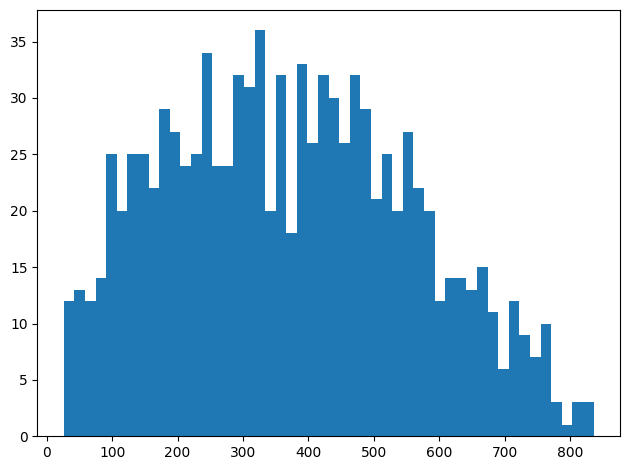

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

N_points = df.shape[0]
n_bins = 50
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df['Historical_Cost_of_Ride'] , bins=n_bins)

plt.show()

To understand what's the definition of  "Historical_Cost_of_Ride", we will get insight from the distribution of "cost_per_unit"

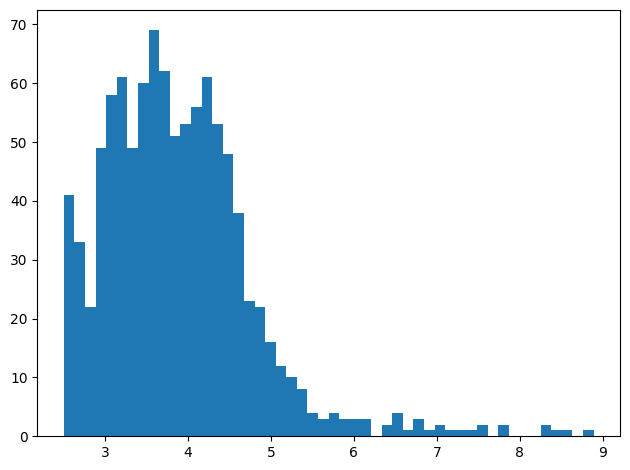

In [15]:

#figure out the relationship between Expected_Ride_Duration and Historical_Cost_of_Ride
df['cost_per_unit'] = df['Historical_Cost_of_Ride']/df['Expected_Ride_Duration']
# Sample data
N_points = df.shape[0]
n_bins = 50
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df['cost_per_unit'] , bins=n_bins)

plt.show()

Overall most of data is centralized around from 2.5 to 5

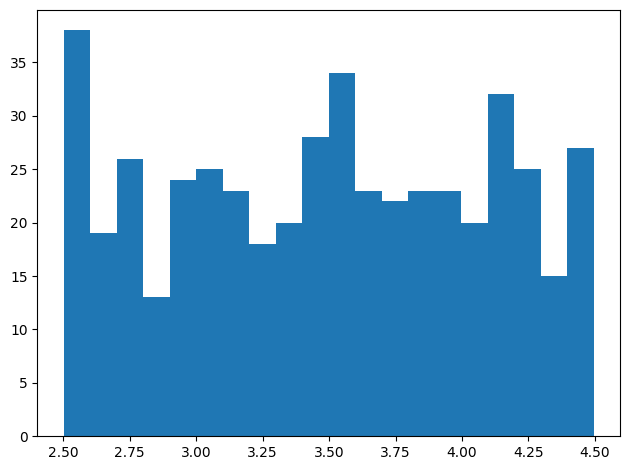

In [16]:
df_Vehicle_Type = df[df['Vehicle_Type'] == 'Economy']['cost_per_unit']

N_points = df_Vehicle_Type.shape[0]
n_bins = 20
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df_Vehicle_Type , bins=n_bins)

plt.show()

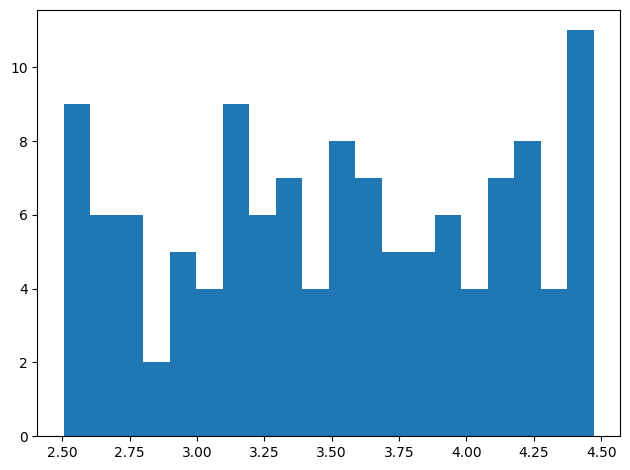

In [17]:
df_Vehicle_Type = df[(df['Vehicle_Type'] == 'Economy') & (df['Time_of_Booking'] == "Afternoon")]['cost_per_unit']

N_points = df_Vehicle_Type.shape[0]
n_bins = 20
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df_Vehicle_Type , bins=n_bins)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

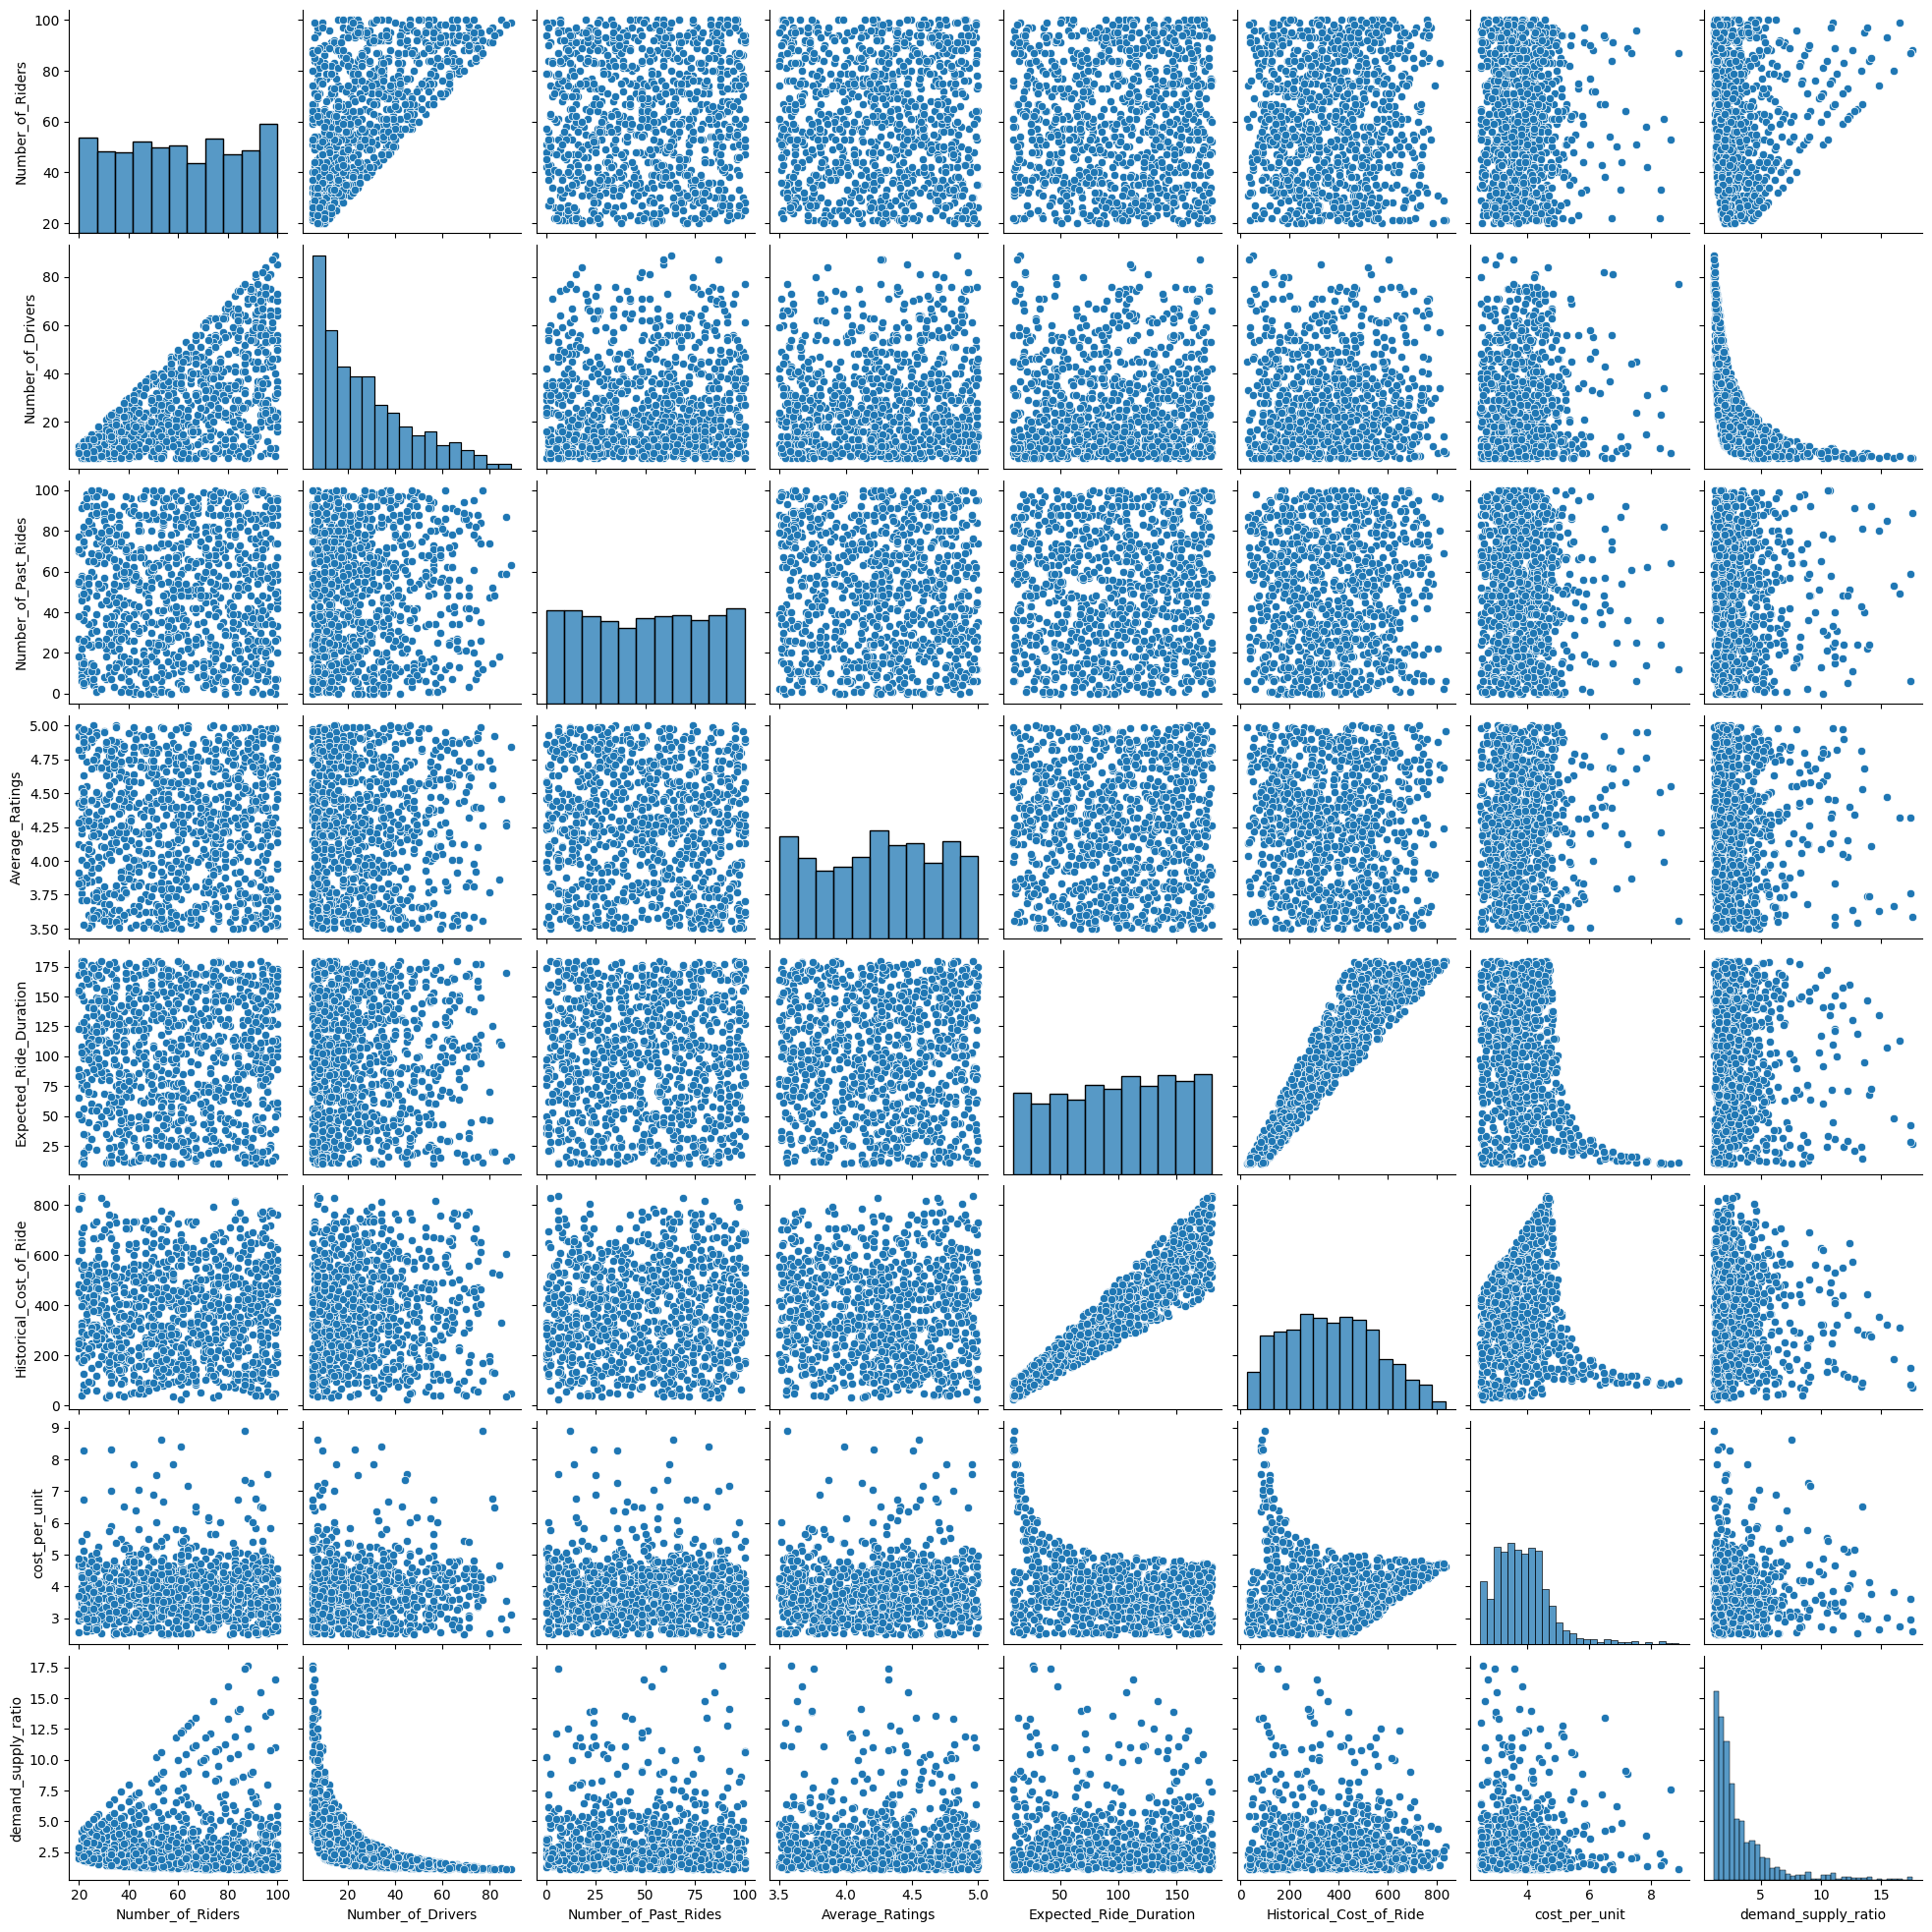

In [18]:
numerical_data = df[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 
                       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride',"cost_per_unit", "demand_supply_ratio"]]

sns.pairplot(numerical_data, diag_kind='hist')
plt.show()

Key insights:
1. "Historical_Cost_of_Ride" and "Expected_Ride_Duration" have strong linear relationship
2. The cost per unit distributed in a small range that's from 2.5 to 5
3. Mostly, the riders is much more than driver, so it's crucial to dispatch the order efficiently

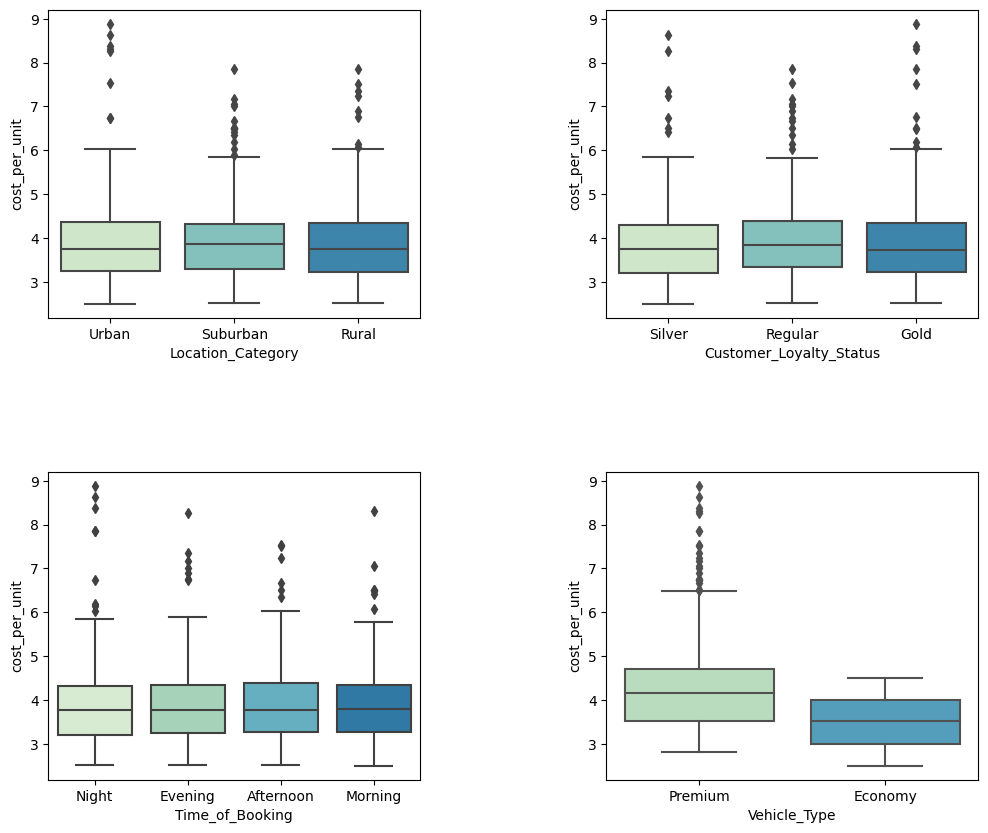

In [14]:
cat = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

# create subplots 
plt.figure(figsize=(12,10))

for i, c in enumerate(cat, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df['cost_per_unit'], x=df[c],  palette='GnBu')
    
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()  

In terms of 'cost per unit',  'Vehicle_Type' is a manifest factor which impact the 'cost per unit', the other factors have no difference.

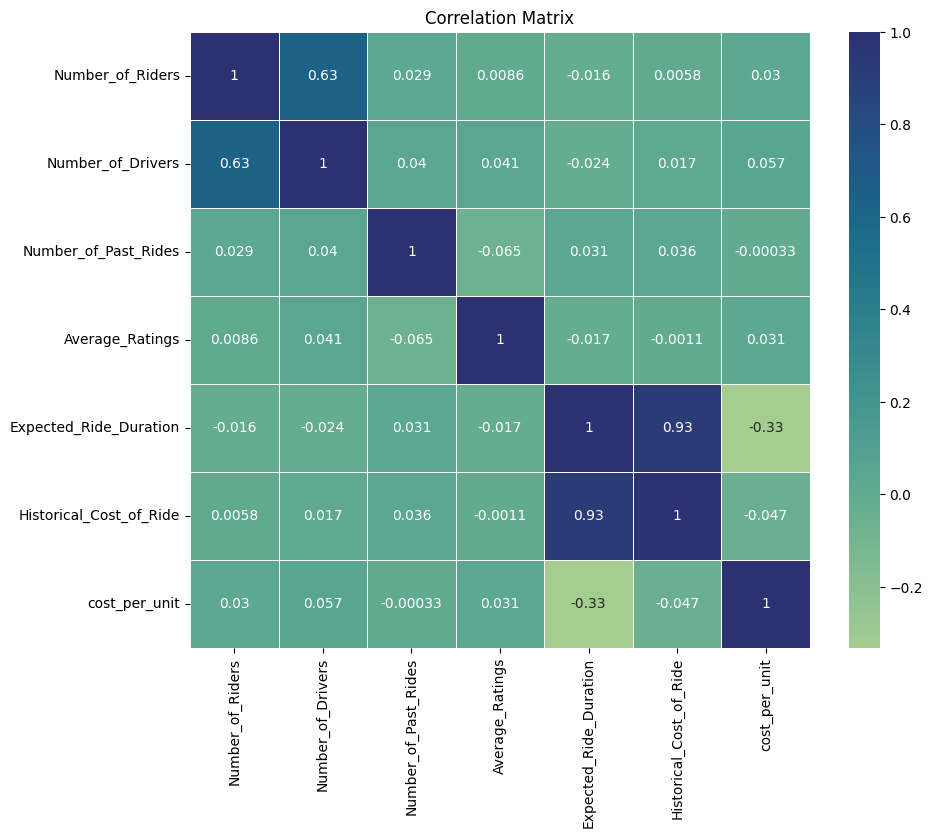

In [15]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

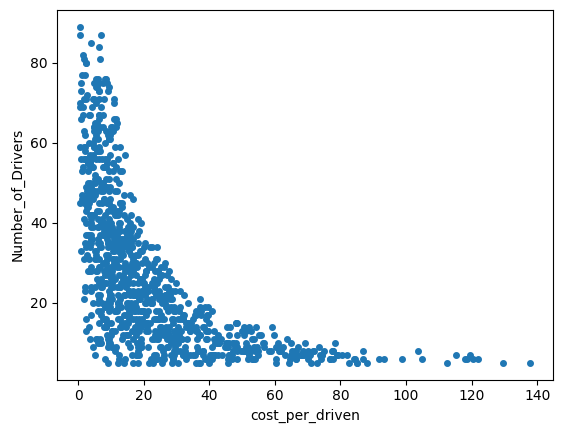

In [21]:
df['cost_per_driven'] = df['Historical_Cost_of_Ride'] /df['Number_of_Drivers']
# plot

fig, ax = plt.subplots()
ax.plot(df['cost_per_driven'], df['Number_of_Drivers'], '.', markeredgewidth=2)
ax.set_xlabel("cost_per_driven")
ax.set_ylabel("Number_of_Drivers")
plt.show()

**Supply-Demand Gap:**
We compute the difference and ratio between riders and drivers. In every instance, demand exceeds supply (on average ~60 riders vs ~27 drivers), indicating prevalent surge-pricing conditions. For example, the rider-to-driver ratio ranges from ~1.1 up to ~17.6 (mean ~3.24), reflecting varying degrees of driver scarcity.


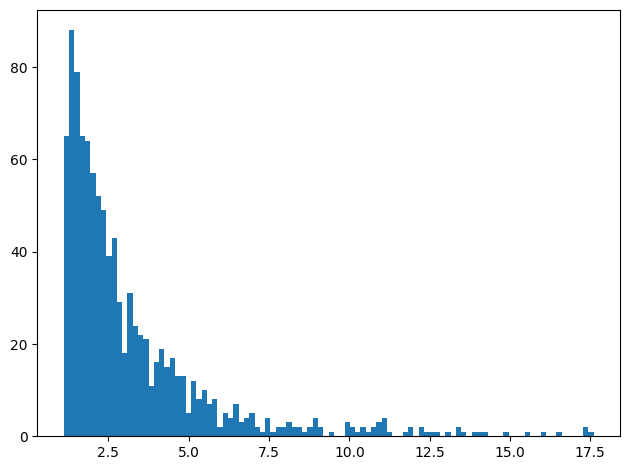

In [10]:
df['demand_supply_ratio'] = df['Number_of_Riders']/df['Number_of_Drivers']

N_points = df.shape[0]
n_bins = 100
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df['demand_supply_ratio'] , bins=n_bins)

plt.show()

In [19]:
#Surge pricing is the output of an algorithm which automatically raises the price of 
#a trip when demand outstrips supply within a fixed geographic area. Trip prices are 
#adjusted by multiplying the prices of the underlying components which make up fare –the base fare, the price per mile,
#and the price per minute–10 by a multiplier output by the surge algorithm

def calculate_surge_multiplier(row):
    demand_supply_ratio = row["Number_of_Riders"] / max(row["Number_of_Drivers"], 1)  # Avoid division by zero

    surge_multiplier = 1.0

    if demand_supply_ratio > 3:
        surge_multiplier += 1.5 
    elif demand_supply_ratio > 2:
        surge_multiplier += 1.2 
    elif demand_supply_ratio > 1.5:
        surge_multiplier += 0.8 

    # Time of Booking Adjustments
    time_factor = {"Night": 1.2, "Evening": 1.15, "Afternoon": 1.1, "Morning": 1.0}
    surge_multiplier *= time_factor.get(row["Time_of_Booking"], 1.0)

    # Location Adjustments
    location_factor = {"Urban": 1.2, "Suburban": 1.1, "Rural": 1.0}
    surge_multiplier *= location_factor.get(row["Location_Category"], 1.0)

    # Vehicle Type Adjustments
    if row["Vehicle_Type"] == "Premium":
        surge_multiplier *= 1.3  # Premium vehicles have higher surge

    # Loyalty Discount (Regular customers get a small discount)
    if row["Customer_Loyalty_Status"] == "Regular":
        surge_multiplier *= 0.9

    return round(surge_multiplier, 2)


df["Surge_Multiplier"] = df.apply(calculate_surge_multiplier, axis=1)

df["adjusted_ride_cost"] = df["Historical_Cost_of_Ride"] * df["Surge_Multiplier"]



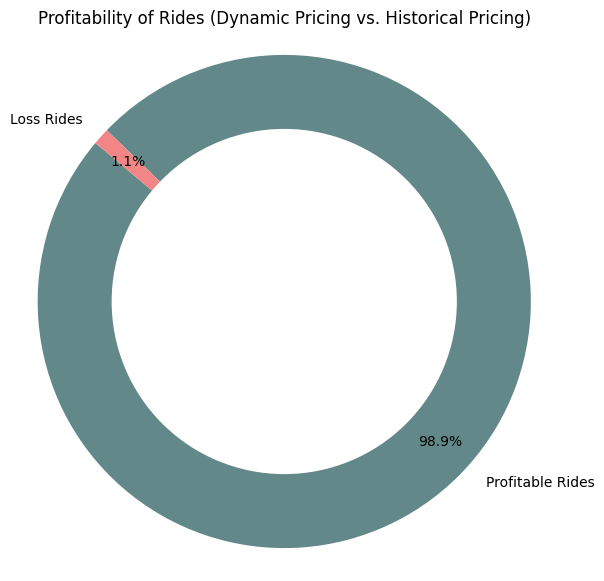

In [20]:
# Calculate the profit percentage for each ride
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) 
                           / df['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = df[df['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = df[df['profit_percentage'] < 0]
# Calculate the profit percentage for each ride
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) 
                           / df['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = df[df['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = df[df['profit_percentage'] < 0]

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

plt.figure(figsize=(7, 7))

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors = ['#638889', '#f28585'], labeldistance = 1.1,
                  pctdistance = 0.85, normalize=True
)

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')


plt.show()